In [1]:
from data_loader import WireDataset
import torch
import math
import numpy as np
from torch.utils.data import DataLoader
from ML import Net
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchmetrics.classification import F1Score, MulticlassRecall, MulticlassConfusionMatrix


/home/enrico/anaconda3/envs/py37/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = WireDataset("Input_Data.csv")
# TODO add to device

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [3]:
generator = torch.Generator().manual_seed(4)

train_fraction = math.floor(len(dataset)*0.7)
test_fraction = len(dataset) - train_fraction

test_data_ind, train_data_ind = torch.utils.data.random_split(dataset, [test_fraction, train_fraction], generator = generator)

dl_train = DataLoader(train_data_ind, batch_size=20, shuffle=True) #todevice
dl_test = DataLoader(test_data_ind, batch_size=20, shuffle=True) #todevice

net = Net() #todevice
#optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 100

In [4]:
epochs_F1List = np.zeros((2, 100))
F1= F1Score("multiclass", num_classes = 6)
f1_max = 0

In [5]:
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    net.train()
    for i, data in enumerate(dl_train, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 30 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
            running_loss = 0.0
    
    predictions_list = [] #list for predictions (predicted number of label)
    values_list = []      #list for values (actual number of label)
    f1_list = np.zeros(len(dl_test))
    net.eval()
    running_loss = 0.0
    for i, data in enumerate(dl_test, 0):
        inputs, labels = data
        # forward + backward + optimize
        outputs = net(inputs)
        f1_list[i] = F1(outputs, labels).item()
        if i % 10 == 9:    # print every 10 mini-batches
            print(f"[batch {i}, size: {dl_test.batch_size}] F1 score: {f1_list[i]}")
    
    epochs_F1List[0][epoch] = f1_list.mean()
    epochs_F1List[1][epoch] = f1_list.std()
    
    if epochs_F1List[0][epoch] > f1_max:
        torch.save(net.state_dict(), "model.ebr")
        f1_max=epochs_F1List[0][epoch]

[1,    10] loss: 1.775
[1,    20] loss: 1.714
[1,    30] loss: 1.689
[1,    40] loss: 1.631
[1,    50] loss: 1.575
[1,    60] loss: 1.432
[1,    70] loss: 1.326
[1,    80] loss: 1.291
[1,    90] loss: 1.336
[1,   100] loss: 1.257
[1,   110] loss: 1.281
[1,   120] loss: 1.164
[batch 9, size: 20] F1 score: 0.699999988079071
[batch 19, size: 20] F1 score: 0.550000011920929
[batch 29, size: 20] F1 score: 0.44999998807907104
[batch 39, size: 20] F1 score: 0.550000011920929
[batch 49, size: 20] F1 score: 0.44999998807907104


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[2,    10] loss: 1.243
[2,    20] loss: 1.249
[2,    30] loss: 1.208
[2,    40] loss: 1.200
[2,    50] loss: 1.223
[2,    60] loss: 1.335
[2,    70] loss: 1.201
[2,    80] loss: 1.186
[2,    90] loss: 1.296
[2,   100] loss: 1.202
[2,   110] loss: 1.155
[2,   120] loss: 1.297
[batch 9, size: 20] F1 score: 0.75
[batch 19, size: 20] F1 score: 0.3499999940395355
[batch 29, size: 20] F1 score: 0.550000011920929
[batch 39, size: 20] F1 score: 0.6000000238418579
[batch 49, size: 20] F1 score: 0.6499999761581421


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[3,    10] loss: 1.210
[3,    20] loss: 1.203
[3,    30] loss: 1.187
[3,    40] loss: 1.275
[3,    50] loss: 1.044
[3,    60] loss: 1.136
[3,    70] loss: 1.195
[3,    80] loss: 1.119
[3,    90] loss: 1.196
[3,   100] loss: 1.208
[3,   110] loss: 1.111
[3,   120] loss: 1.044
[batch 9, size: 20] F1 score: 0.8500000238418579
[batch 19, size: 20] F1 score: 0.8500000238418579
[batch 29, size: 20] F1 score: 0.800000011920929
[batch 39, size: 20] F1 score: 0.550000011920929
[batch 49, size: 20] F1 score: 0.6499999761581421


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[4,    10] loss: 1.008
[4,    20] loss: 0.962
[4,    30] loss: 1.014
[4,    40] loss: 1.125
[4,    50] loss: 1.038
[4,    60] loss: 0.990
[4,    70] loss: 1.058
[4,    80] loss: 1.008
[4,    90] loss: 0.905
[4,   100] loss: 0.898
[4,   110] loss: 0.937
[4,   120] loss: 1.131
[batch 9, size: 20] F1 score: 0.699999988079071
[batch 19, size: 20] F1 score: 0.75
[batch 29, size: 20] F1 score: 0.800000011920929
[batch 39, size: 20] F1 score: 0.6499999761581421
[batch 49, size: 20] F1 score: 0.800000011920929


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[5,    10] loss: 0.895
[5,    20] loss: 0.914
[5,    30] loss: 0.928
[5,    40] loss: 0.905
[5,    50] loss: 0.785
[5,    60] loss: 0.988
[5,    70] loss: 0.894
[5,    80] loss: 0.790
[5,    90] loss: 0.812
[5,   100] loss: 0.850
[5,   110] loss: 0.779
[5,   120] loss: 0.830
[batch 9, size: 20] F1 score: 0.800000011920929
[batch 19, size: 20] F1 score: 0.699999988079071
[batch 29, size: 20] F1 score: 0.75
[batch 39, size: 20] F1 score: 0.699999988079071
[batch 49, size: 20] F1 score: 0.8500000238418579


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[6,    10] loss: 0.737
[6,    20] loss: 0.994
[6,    30] loss: 0.903
[6,    40] loss: 0.769
[6,    50] loss: 0.853
[6,    60] loss: 0.612
[6,    70] loss: 0.885
[6,    80] loss: 0.840
[6,    90] loss: 0.680
[6,   100] loss: 0.597
[6,   110] loss: 0.746
[6,   120] loss: 0.652
[batch 9, size: 20] F1 score: 0.8500000238418579
[batch 19, size: 20] F1 score: 0.699999988079071
[batch 29, size: 20] F1 score: 0.8999999761581421
[batch 39, size: 20] F1 score: 0.75
[batch 49, size: 20] F1 score: 0.75


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[7,    10] loss: 0.643
[7,    20] loss: 0.761
[7,    30] loss: 0.863
[7,    40] loss: 0.816
[7,    50] loss: 0.816
[7,    60] loss: 0.702
[7,    70] loss: 0.628
[7,    80] loss: 0.833
[7,    90] loss: 0.744
[7,   100] loss: 0.732
[7,   110] loss: 0.639
[7,   120] loss: 0.757
[batch 9, size: 20] F1 score: 0.8999999761581421
[batch 19, size: 20] F1 score: 0.699999988079071
[batch 29, size: 20] F1 score: 0.699999988079071
[batch 39, size: 20] F1 score: 0.75
[batch 49, size: 20] F1 score: 0.8999999761581421


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

[8,    10] loss: 0.642
[8,    20] loss: 0.644
[8,    30] loss: 0.658
[8,    40] loss: 0.695
[8,    50] loss: 0.646
[8,    60] loss: 0.679
[8,    70] loss: 0.589
[8,    80] loss: 0.486
[8,    90] loss: 0.687
[8,   100] loss: 0.691
[8,   110] loss: 0.659
[8,   120] loss: 0.553
[batch 9, size: 20] F1 score: 0.800000011920929
[batch 19, size: 20] F1 score: 0.8500000238418579
[batch 29, size: 20] F1 score: 0.6000000238418579
[batch 39, size: 20] F1 score: 0.8500000238418579
[batch 49, size: 20] F1 score: 0.800000011920929
[9,    10] loss: 0.613
[9,    20] loss: 0.707
[9,    30] loss: 0.750
[9,    40] loss: 0.584
[9,    50] loss: 0.621
[9,    60] loss: 0.646
[9,    70] loss: 0.649
[9,    80] loss: 0.561
[9,    90] loss: 0.531
[9,   100] loss: 0.496
[9,   110] loss: 0.642
[9,   120] loss: 0.548
[batch 9, size: 20] F1 score: 0.800000011920929
[batch 19, size: 20] F1 score: 0.800000011920929
[batch 29, size: 20] F1 score: 1.0
[batch 39, size: 20] F1 score: 0.800000011920929
[batch 49, size: 20]

Finished Training
0.9050595174942698
[0.06885685]


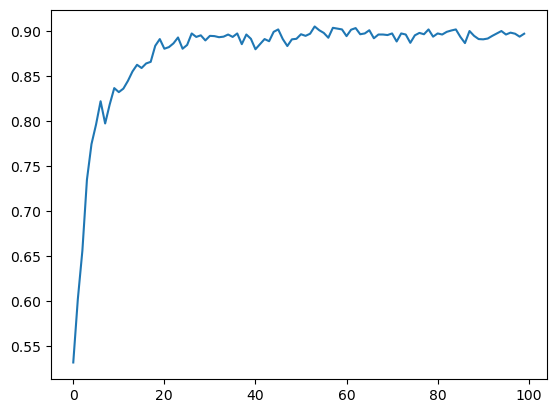

In [6]:
print('Finished Training')


plt.plot(epochs_F1List[0])
print(epochs_F1List[0].max())

ind = np.where(epochs_F1List[0]==epochs_F1List[0].max())
print(epochs_F1List[1][ind])
plt.savefig("f1.png")

In [7]:

mcr = MulticlassRecall(num_classes=6, average=None)
mccm = MulticlassConfusionMatrix(num_classes=6)

net.eval()
out = None
lab = None
f1_list = np.zeros(len(dl_test))
running_loss = 0.0
for i, data in enumerate(dl_test, 0):
    inputs, labels = data
    # forward + backward + optimize
    outputs = net(inputs)


    if out is None:
        out = outputs.detach()
    else:
        out = np.vstack((out, outputs.detach()))

    if lab is None:
        lab = labels.detach()
    else:
        lab = np.hstack((lab, labels.detach()))
    f1_list[i] = F1(outputs, labels).item()
    if i % 10 == 9:    # print every 10 mini-batches
        print(f"[batch {i}, size: {dl_test.batch_size}] F1 score: {f1_list[i]}")

print(mcr(torch.Tensor(out), torch.Tensor(lab)))
print(mccm(torch.Tensor(out), torch.Tensor(lab)))

[batch 9, size: 20] F1 score: 0.8999999761581421
[batch 19, size: 20] F1 score: 0.8500000238418579
[batch 29, size: 20] F1 score: 1.0
[batch 39, size: 20] F1 score: 0.8999999761581421
[batch 49, size: 20] F1 score: 0.949999988079071
tensor([0.7727, 0.3548, 0.9594, 0.2500, 0.9358, 0.8113])
tensor([[ 34,   2,   6,   0,   1,   1],
        [  0,  11,  17,   0,   1,   2],
        [  0,   5, 567,   1,   4,  14],
        [  0,   1,   2,   4,   7,   2],
        [  0,   1,   9,   2, 248,   5],
        [  1,   4,  18,   2,   5, 129]])


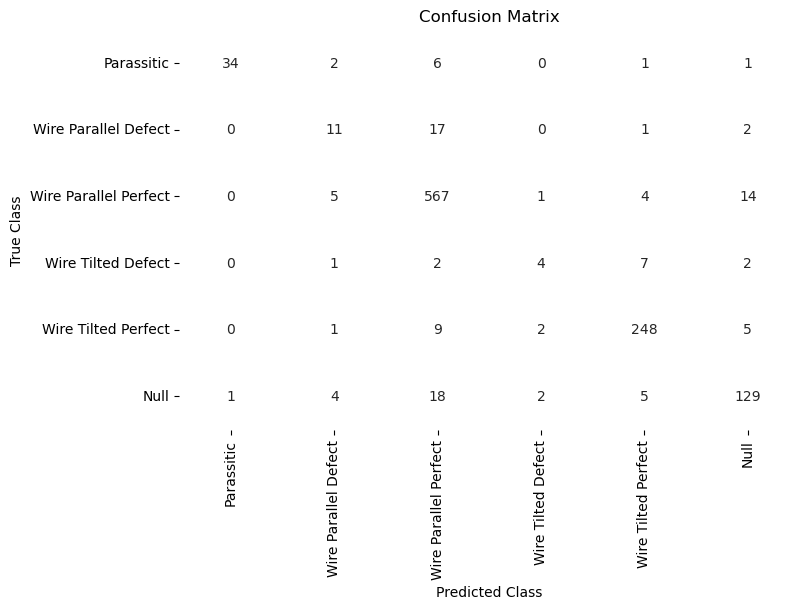

In [18]:
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names = ["Parassitic", "Wire Parallel Defect", "Wire Parallel Perfect", "Wire Tilted Defect", "Wire Tilted Perfect", "Null"]
confusion_marix = ([[ 34,   2,   6,   0,   1,   1],
                    [  0,  11,  17,   0,   1,   2],
                    [  0,   5, 567,   1,   4,  14],
                    [  0,   1,   2,   4,   7,   2],
                    [  0,   1,   9,   2, 248,   5],
                    [  1,   4,  18,   2,   5, 129]])
dataframe = pd.DataFrame(confusion_marix, index=class_names, columns=class_names)
plt.figure(figsize=(8, 6))
 
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap=ListedColormap(["white"]), fmt="d")
plt.title("Confusion Matrix"), plt.tight_layout()
 
plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()